SHOPS CUSTOMER SALES DATA

Features:
- Store ID
- Day of the week
- Date
- Number of customers that day 
- Open: If the store was open (1), if the store was closed (0)
- Promotion: 1 if promotion was active
- State Holidas 
- School Holidays
- Total Sales 

What do we want to achieve?
1) Prediction of the sales of the Shops --> ML model to predict the sales using features like day of the week, promotions, holidays etc. 
2) Visualization through Correlation Framework --> Heatmap correlation to understand which features are most related to sales
3) Sales per Day --> Plot analyisis 

PREDICTION OF THE SALES OF THE SHOPS: 
For that we´ll import the libraries. 
- Pandas libraries when working with structured data like CSV files. 
- Numpy as we have numerical data, will help us to math and for arrays. 
- "scikit-learn" core ML library. 
- "RandomForestRegressor" help us to do the decision tree and effective for regression tasks. 
- R2 score will tell us how much variante in the data we have (closer to 1 is better)
- "matplotlib.pyplot" will help us for plotting our graphs and visualize our results. "seaborn" will help us make our plots prettier.

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

Next step is to load and preview the data and then process it 

In [14]:
df = pd.read_csv("sales.csv")
df['date'] = pd.to_datetime(df['date'])
df.head()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


This data set provides clean and structured view of daily shop activity. 
In the column of promotions 0 = is indicating we do not have any marketing campaign running and = 1 yes. Therefore, from this overivew, we can see that 3 marketing campaigns are running, and sales are higher due to that.

In [15]:
df = df[df['open'] == 1].copy()
df.drop(['Unnamed: 0', 'open', 'state_holiday', 'date'], axis=1, inplace=True)
print(df.isnull().sum())

store_ID               0
day_of_week            0
nb_customers_on_day    0
promotion              0
school_holiday         0
sales                  0
dtype: int64


In this case, we have processed the data in order to remove unnecessary and redundant columns. We have verified that we dont miss any values, this means we confidently move into the model training without worrying about data gaps. 

Define the Features and Target

In [16]:
X = df.drop('sales', axis=1)
y = df['sales']

Now, we´ll run a regression to understand how much a store will sell on a certain day. 
I have opt for the "Random Forest" which helps us find patters between the conditions of a day and the amount of sales that occur. 

In [19]:
from sklearn.model_selection import train_test_split
X = df.drop('sales', axis=1)
y = df['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = RandomForestRegressor(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

After performing the ML model evaluation utilizing hte regression, we´ll predict the feature sales through RMSE and R2. 

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE (Average prediction error): €{rmse:.2f}")
print(f"R² Score (Variance explained): {r2:.2%}")


RMSE (Average prediction error): €775.05
R² Score (Variance explained): 93.75%


We can see that on average daily sell, the model is off by aprox €1,700 per prediction. Which is quite positive and confidence range. 
The model explains that about 88% of the variation in store sales. 
This numbers helps us with staff scheduling, inventory planning and campaing targeting. 



After finalizing building and generating the ML model, it´s time to undersand what variables had the most influence when predicting the output. In this case for me are: 
- number of customers on dayç
- promotion
- day of the week
- school holiday 
- store ID

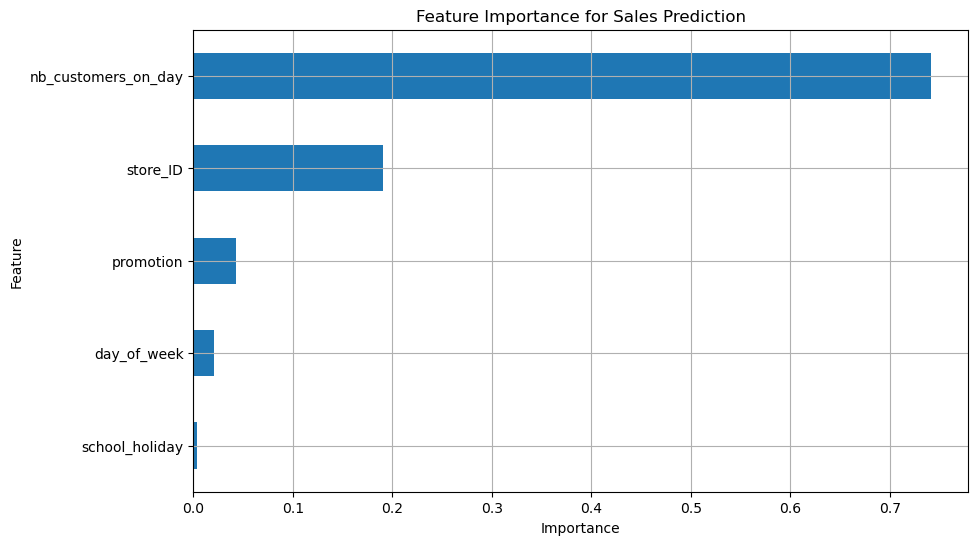

In [30]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(10,6))
feature_importance.plot(kind='barh')
plt.title("Feature Importance for Sales Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(True)
plt.show()

In this chart we can see that customers volumne and promotions have the highest impact, while school holidays and store ID have less influence.

Now, I want to understand what sales by day of the week, we are doing to have

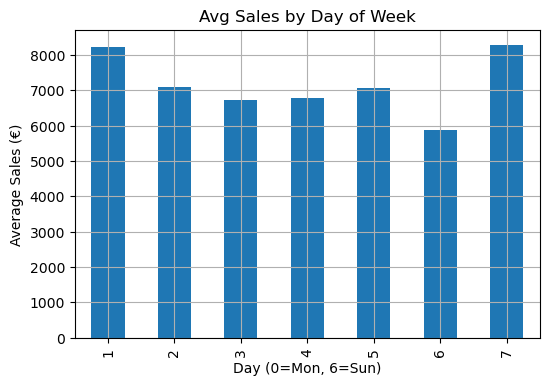

In [32]:
df.groupby('day_of_week')['sales'].mean().plot(kind='bar', figsize=(6,4))
plt.title("Avg Sales by Day of Week")
plt.xlabel("Day (0=Mon, 6=Sun)")
plt.ylabel("Average Sales (€)")
plt.grid(True)
plt.show()

Tuesdays and Sundays have the highest average sales (~€8,200). Key indicator for days to increase staff. 
Saturdays in the other hand are the lowest sales, might be good factor to see if by adding some promotions AOV increases. 

Now, I´ll predict my actual sales vs the prediction we made earlier, using scatter plot which is a great way to visualized the prediuctions with the blue dots. 

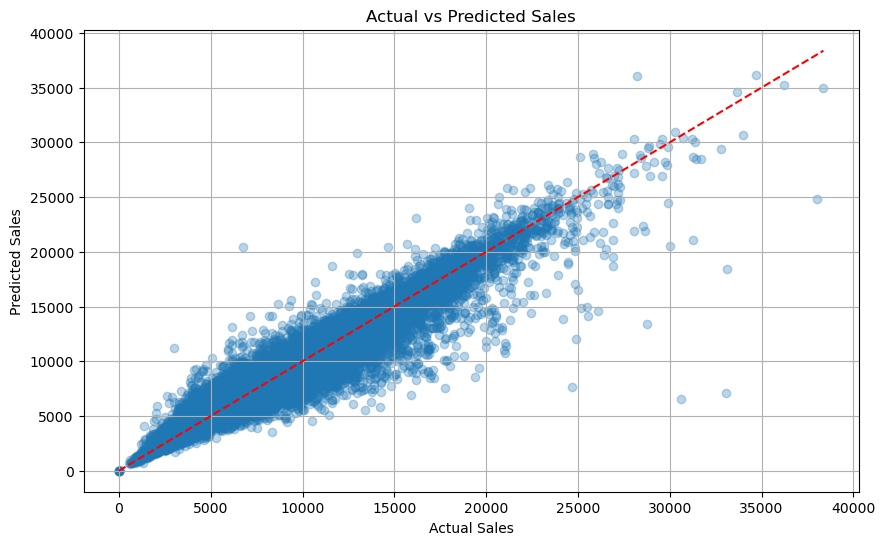

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()

We can see that there is a strong concentration around the line, which mathes with our high R2 score 0.88. 